In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import re
import os
import sys 
import json

!pip install git+https://github.com/haven-jeon/PyKoSpacing.git
!pip install konlpy
!pip install soynlp

from pykospacing import Spacing
from konlpy.tag import Kkma, Komoran, Okt, Mecab
import soynlp

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
import re
import collections
import itertools
!pip install lda
import lda
import requests
import csv
import time
import math
import operator
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
from collections import defaultdict
from pandas import read_table
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-2ql96420
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-2ql96420
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 351 kB 4.0 MB/s 
     |████████████████████████████████| 99 kB 10.9 MB/s 


### __1. wordcloud - wordrank 이용__
* wordrank 알고리즘을 이용해 2022 베이징 동계 올림픽 키워드 추출 후 워드 클라우드로 시각화

In [26]:
# 데이터 불러오기
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/boaz/올림픽트윗워드클라우드/olympics_tweets_final_중복제거.csv')

In [28]:
# 전처리
from konlpy.tag import Okt, Kkma, Komoran

okt = Okt() 
kkma = Kkma()
kom = Komoran() # 왠지 모르겠는데 인코딩 오류남

def preprocess_review(review):
    total_review = ''
    #인풋리뷰
    for idx in range(len(review)):
        sentence = review[idx]
        #하나의 리뷰에서 문장 단위로 전처리
        #sentence = re.sub(name.split(' ')[0],'',r)
        #sentence = re.sub(name.split(' ')[1],'',sentence)
        sentence = re.sub('\n','',sentence)
        sentence = re.sub('\u200b','',sentence)
        sentence = re.sub('\xa0','',sentence)
        sentence = re.sub('([a-zA-Z])','',sentence)
        sentence = re.sub('[ㄱ-ㅎㅏ-ㅣ]+','',sentence)
        sentence = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',sentence)
        if len(sentence) == 0:
            continue
        sentence = okt.pos(sentence, stem=True)
        word = []
        for i in sentence:
            if not i[1] == 'Noun':
                continue
            if len(i[0]) == 1:
                continue
            word.append(i[0])
        word = ' '.join(word)
        word += '. '
        total_review += word
    return total_review.split('. ')

In [31]:
# 키워드 추출
!pip install KRWordRank
from krwordrank.word import summarize_with_keywords

def item_keyword(df, stopwords):
  review = df['Text']
  texts = preprocess_review(review)
  stopwords = {'트친소', '이제' ,'준비', '다시' ,'다른', '그냥'}
  keywords = summarize_with_keywords(texts, min_count=5, max_length=10,
           beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
  return keywords

# 워드 클라우드 
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

def item_wordcloud(df, stopwords, keywords):

  def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(240,250),np.random.randint(0,100),np.random.randint(15,20)))

  icon = Image.open('/content/drive/MyDrive/boaz/올림픽트윗워드클라우드/빙둔둔-removebg-preview.png')

  mask = Image.new("RGB", icon.size, (255,255,255))
  mask.paste(icon,icon)
  mask = np.array(mask)

  image_colors = ImageColorGenerator(mask)

  font_path='/content/drive/MyDrive/NanumSquareB.ttf'
  stopwords = {'트친소', '이제' ,'준비', '다시' ,'다른', '그냥'}
  passwords = {word:score for word, score in sorted(
             keywords.items(), key=lambda x:-x[1]) if not (word in stopwords)}
  krwordrank_cloud = WordCloud(
                     font_path = font_path,
                     width = 800,
                     height = 800,
                     background_color="white",
                     mask = mask
                     )
  
  krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

  fig = plt.figure(figsize=(10, 10))
  #plt.imshow(krwordrank_cloud.recolor(color_func=color_func), interpolation="bilinear")
  plt.imshow(krwordrank_cloud.recolor(color_func=image_colors), interpolation="bilinear")
  plt.savefig('wc_올림픽.png')
  plt.axis('off')
  return plt.show()

scan vocabs ... 
num vocabs = 5588
done
{'올림픽': 183.83904309974832, '선수': 46.30884001578906, '베이징': 22.500541674688083, '쇼트': 12.686108462989736, '이번': 12.441607023901925, '진짜': 12.183216145016194, '경기': 11.096111218342786, '중국': 10.688406392066328, '피겨': 10.51217208432392, '동계': 10.083352854217987, '금메달': 9.817223248554026, '여자': 8.877936298329967, '보고': 8.537997406337455, '오늘': 8.284159768418268, '출전': 7.807652895418224, '사람': 7.521713029108994, '남자': 7.455775126571831, '한국': 7.445396163554884, '메달': 7.398197090127349, '생각': 7.355455869471061, '평창': 6.942729775605762, '출장': 6.607496421017187, '우리': 6.537293235358324, '러시아': 6.533958447975626, '지금': 6.382505981196092, '다음': 6.288380283688293, '도핑': 6.012921413912524, '비키니': 5.956147999120455, '곽윤기': 5.769611021792163, '폐막식': 5.556531474212496, '영상': 5.5100523345082095, '시즌': 5.449568680587665, '종목': 5.0466215062369475, '때문': 4.994738619426761, '응원': 4.925361251812132, '컬링': 4.873207980819768, '오피': 4.752824549764754, '세계': 4.747249945

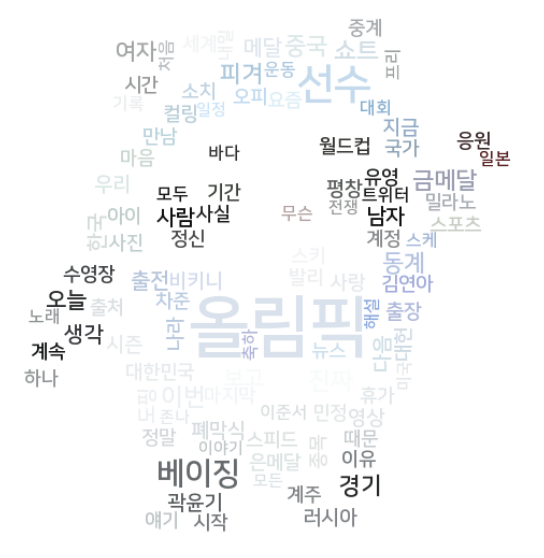

In [32]:
# 최종 
keywords = item_keyword(df, stopwords)
print(keywords)
item_wordcloud(df, stopwords, keywords)

### __2. word cloud - count 기반__

In [17]:
# 라이브러리 for 워드클라우드

# 데이터 조작 관련
import pandas as pd
import numpy as np
import re

# 한국어 nlp
from konlpy.tag import *   # 모든 형태소분석기 import 하기
#1. hannanum = Hannanum()
#2. kkma = Kkma()
#3. komoran = Komoran()
#4. okt = Okt()

okt = Okt()

### 위 4개중 원하는 형태소분석기를 사용하면 됨 --> okt추천

# 영어 nlp 관련
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

# 시각화 관련
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# 기타
from tqdm import tqdm_notebook, tqdm   # for문 진행상황 눈으로 확인 (loading bar)
import datetime

In [ ]:
# 전처리 함수 정의

def load_stopwords():
    with open('/content/drive/MyDrive/boaz/stopword.txt', 'r') as f:
        list_file = f.readlines()
    return list_file[0].split(",")

def extract_word(text):
    hangul = re.compile('[^가-힣]') 
    result = hangul.sub(' ', text) 
    return result

def make_wordlist(text, stopwords): 
    print("리뷰들을 모아 분석하는 중입니다.....")
    #정규표현식 적용 -> 한글 표현만 남기기
    print("데이터 정제 중....")
    words = extract_word(text)
    #띄어쓰기 교정
    spacing = Spacing()
    #형태소 분석(명사 추출)
    print("형태소 분석 중....")
    okt = Okt()
    words = okt.nouns(words)
    #한글자 제거 
    print("한글자 제거 중....")
    words = [x for x in words if len(x)>1]
    #불용어 제거
    print("불용어 제거 중....")
    words = [x for x in words if x not in stopwords]
    #최소횟수 미만 제거 -> 일단 5회로 지정 
    print("의미있는 단어리스트 생성 중....")
    time.sleep(1)
    minimum_count = 5
    final = []
    for i in tqdm(range(len(words))):
        tmp = words[i]
        if words.count(tmp) >= minimum_count:
            final.append(tmp)
    return set(final) #조건을 만족하는 단어 리스트

def preprocess_review(text, word_list):
    text = extract_word(text)
    okt = Okt()
    text = okt.nouns(text)
    text = [x for x in text if x in word_list]
    return text

In [18]:
# 1차 전처리
df = pd.read_csv('/content/drive/MyDrive/boaz/올림픽트윗워드클라우드/olympics_tweets_final_중복제거.csv')
text = " ".join(df['Text'].tolist())
stopwords = load_stopwords()
word_list = make_wordlist(text, stopwords)
word_review_origin = preprocess_review(text, word_list)

# 1차 전처리 확인
print(len(word_review_origin))
print(word_review_origin)

리뷰들을 모아 분석하는 중입니다.....
데이터 정제 중....
형태소 분석 중....
한글자 제거 중....
불용어 제거 중....
의미있는 단어리스트 생성 중....


100%|██████████| 112525/112525 [07:35<00:00, 247.25it/s]


97194
['곽윤기', '선수', '과제', '때문', '디엠', '가지', '목표', '베이징', '올림픽', '출전', '말씀', '활약', '남성', '조정', '박진용', '선수', '베이징', '동계올림픽', '루지', '인승', '기록', '베이징올림픽', '올림픽', '루지', '베이징', '올림픽', '핀란드', '선수촌', '장난', '기사', '중국', '올림픽', '혼란', '차준', '선수', '곽윤기', '선수', '차준', '선수', '올림픽', '청춘', '계심', '올림픽', '배성재', '곽윤기', '진심', '레전드', '동안', '전부', '올림픽', '저기', '선수', '베이징', '올림픽', '한국인', '최초', '남자', '금메달', '수영장', '베이징', '올림픽', '우리', '유즈', '한국', '필수', '유즈루', '잠깐', '올림픽', '중계', '공동', '요구', '거절', '이용', '민정', '선수', '베이징', '동계올림픽', '쇼트트랙', '여자', '은메달', '획득', '축하', '민정', '베이징올림픽', '올림픽', '은메달', '쇼트트랙', '동계', '올림픽', '차이', '얼음', '종목', '설명', '아이', '이해', '의문', '제기', '종목', '존재', '곽윤기', '선수', '올림픽', '제일', '기대', '섭외', '방송사', '연락', '준비', '해설', '역시', '곽윤기', '카메라', '올림픽', '중계', '고요', '대헌', '형님', '벌써', '올림픽', '당황', '올림픽', '개최', '개월', '부터', '기획', '모든', '선수', '인터뷰', '제작', '컨텐츠', '제대로', '외모', '로만', '또한', '외모', '언급', '요즘', '베이징', '동계올림픽', '스켈레톤', '남자', '결과', '승기', '성빈', '승기', '성빈', '베이징올림픽', '올림픽', '스켈레톤', '경기', '결과', '이전', '기록', '

In [49]:
# 2차 전처리: 불용어 제거 

word_review = word_review_origin # 혹시 모르니 원본 살려놓기 

stopwords = [
             '트친소', '이제' ,'준비', '다시' ,'다른', '그냥', '때문', '디엠', '가지', '말씀', 
             '조정', '보지', '그때', '벌써', '스푼', '해도' ,'타고', '진짜', '올림픽', '이번',
             '지금', '오늘', '트위터', '생각', '계속', '얘기', '이유', '하나', '오피', '비키니',
             '다음', '사람', '동안', '시간', '우리', '대회', '모두', '탐라', '정도', '진심', '위해',
             '제일', '한번', '제발', '얼마나', '정말', '사실', '리스트', '여러분', '출장'
             ]

word_review = [word for word in word_review if not word in stopwords]
print(len(word_review))

73318


In [50]:
# 워드카운트
count = Counter(word_review).most_common()  # 카운트 후 빈도순 정렬
count = pd.DataFrame(count)       # df형태로 만들기
count.columns = ['word','count']  # 칼럼명 설정
count[:100]

,word,count
0,선수,2822
1,쇼트트랙,1104
2,베이징,1085
3,경기,664
4,중국,661
...,...,...
95,문제,110
96,눈물,109
97,모습,108
98,피겨스케이팅,108


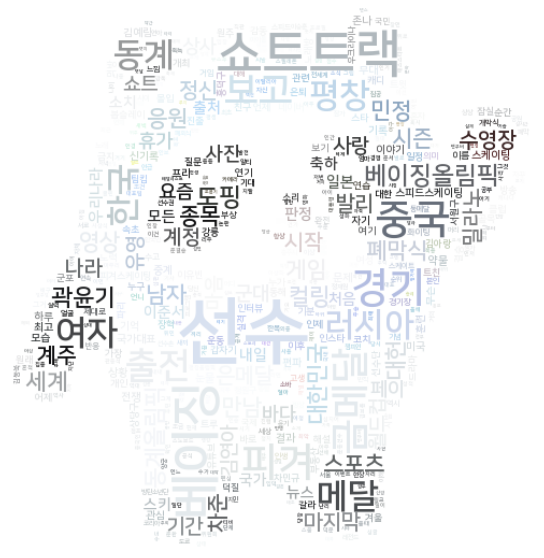

In [51]:
# 워드클라우드
icon = Image.open('/content/drive/MyDrive/boaz/올림픽트윗워드클라우드/빙둔둔-removebg-preview.png')
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

data = dict(zip(count['word'].tolist(), count['count'].tolist()))
wc = WordCloud(font_path='/content/drive/MyDrive/NanumSquareB.ttf',   #폰트
               background_color='white',                              #배경색
               width=800, height=600 ,                                #사이즈설정
               max_words=500,                                         #단어갯수
               mask=mask)                                             #마스크설정                   

cloud = wc.generate_from_frequencies(data)                            #사전형태의 데이터 넣기
image_colors = ImageColorGenerator(mask)                              #마스킹에 맞춰서 색상 설정 

plt.figure(figsize=(10,10))                                          #액자사이즈설정
plt.axis('off')   
plt.imshow(wc.recolor(color_func=image_colors),interpolation="bilinear")
plt.savefig('/content/drive/MyDrive/boaz/올림픽트윗워드클라우드/wc_올림픽.png')